In [1]:
import numpy as np

# Define the parameters
beta_0 = 1.0  # Example value for beta_0
beta_1 = 0.5  # Example value for beta_1
X = 2.0       # Example value for X

# Calculate p(X) using the first expression
p_X = np.exp(beta_0 + beta_1 * X) / (1 + np.exp(beta_0 + beta_1 * X))

# Calculate p(X) / (1 - p(X)) to verify it matches e^(beta_0 + beta_1 * X)
lhs = p_X / (1 - p_X)               # Left-hand side of the equivalence
rhs = np.exp(beta_0 + beta_1 * X)   # Right-hand side of the equivalence

# Output the results
print("p(X):", p_X)
print("p(X) / (1 - p(X)):", lhs)
print("e^(beta_0 + beta_1 * X):", rhs)

# Check if the expressions are approximately equal
print("Are the expressions equivalent?", np.isclose(lhs, rhs))


p(X): 0.8807970779778824
p(X) / (1 - p(X)): 7.389056098930649
e^(beta_0 + beta_1 * X): 7.38905609893065
Are the expressions equivalent? True


              Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
std       6.033182     2.357013     2.357254     2.360502     2.360279   
min    1990.000000   -18.195000   -18.195000   -18.195000   -18.195000   
25%    1995.000000    -1.154000    -1.154000    -1.158000    -1.158000   
50%    2000.000000     0.241000     0.241000     0.241000     0.238000   
75%    2005.000000     1.405000     1.409000     1.409000     1.409000   
max    2010.000000    12.026000    12.026000    12.026000    12.026000   

              Lag5       Volume        Today  
count  1089.000000  1089.000000  1089.000000  
mean      0.139893     1.574618     0.149899  
std       2.361285     1.686636     2.356927  
min     -18.195000     0.087465   -18.195000  
25%      -1.166000     0.332022    -1.154000  
50%       0.234000     1.002680     0.241000  
75% 

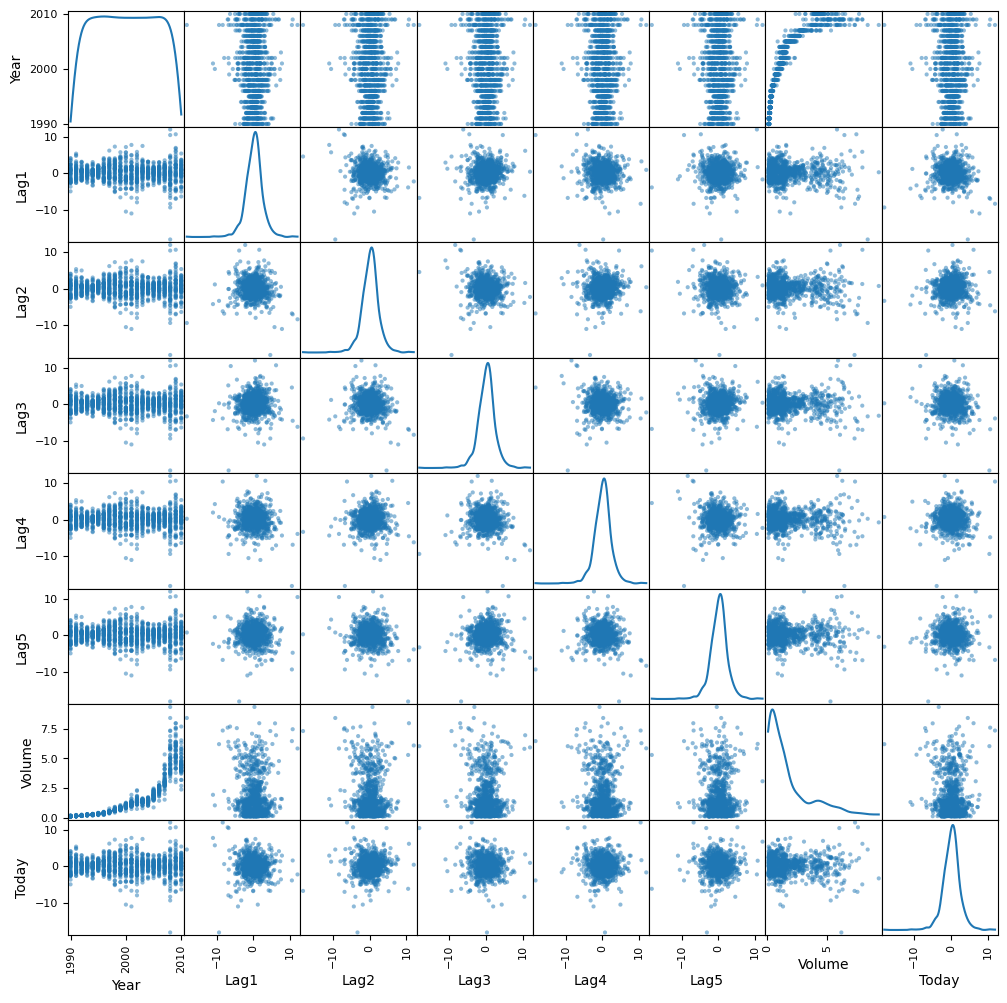

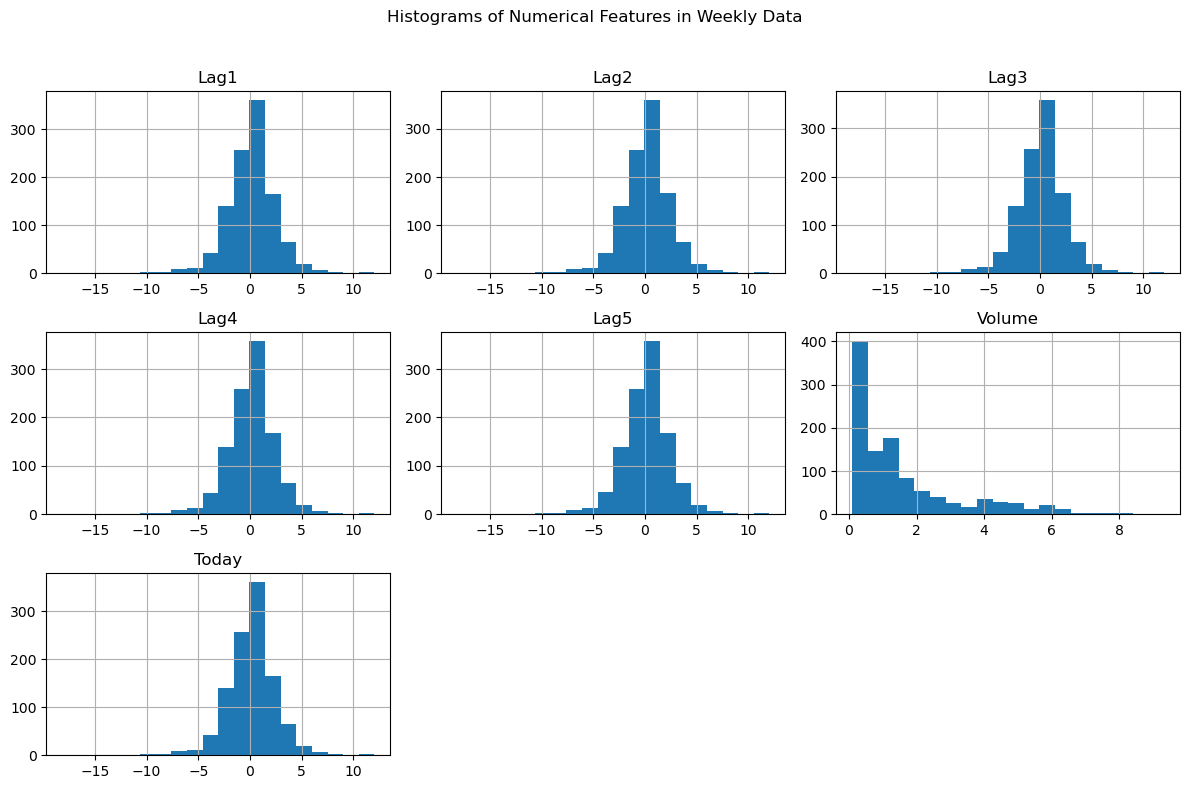

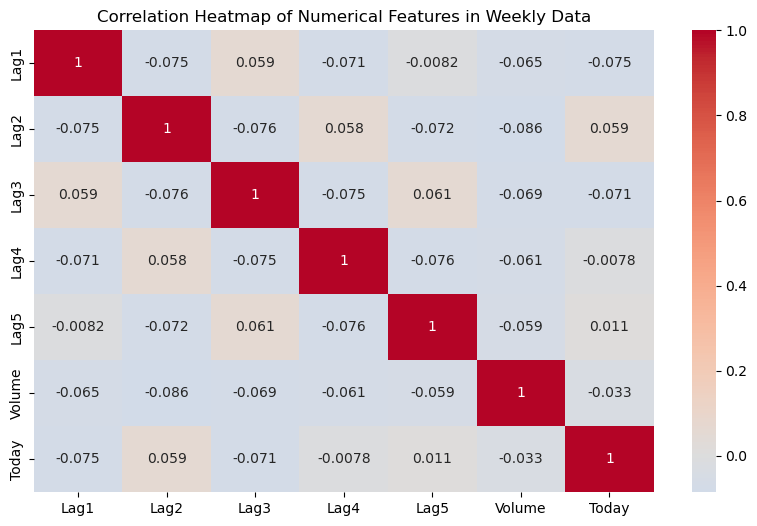

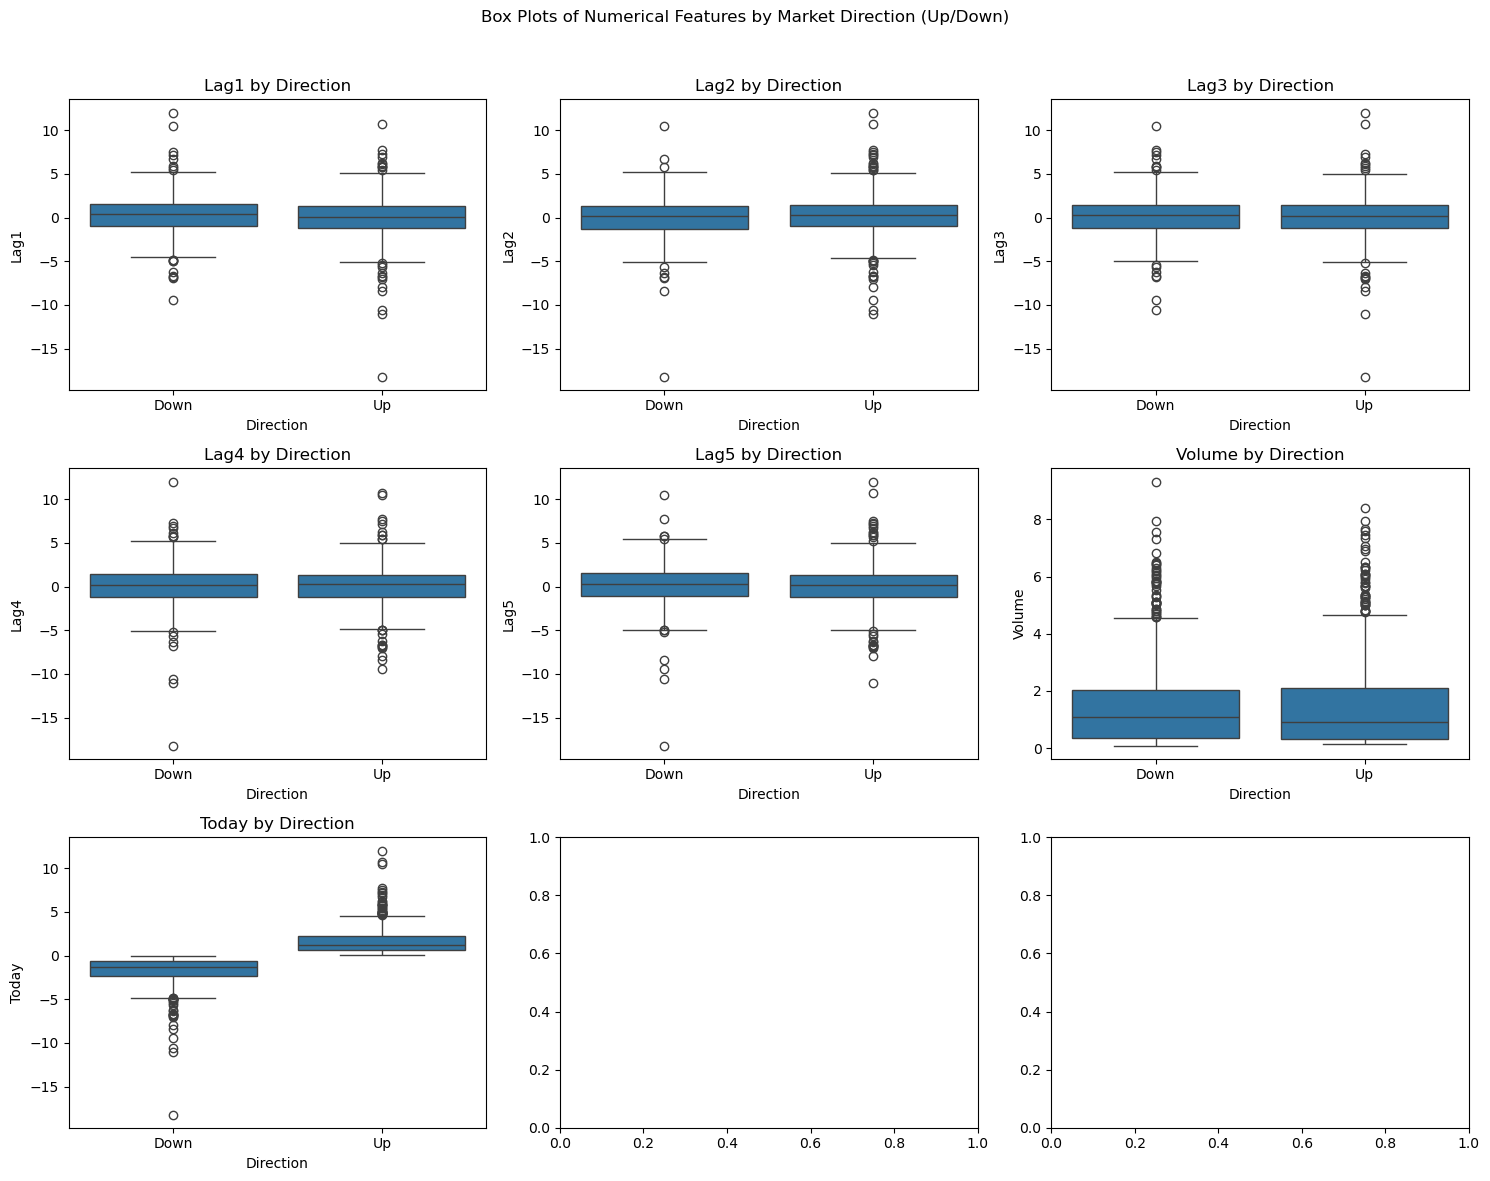

[[ 54 430]
 [ 48 557]]
Accuracy: 0.5610651974288338
[[ 9 34]
 [ 5 56]]
Accuracy: 0.625
[[ 9 34]
 [ 5 56]]
Accuracy: 0.625
[[ 0 43]
 [ 0 61]]
Accuracy: 0.5865384615384616
[[22 21]
 [30 31]]
Accuracy: 0.5096153846153846
[[ 0 43]
 [ 0 61]]
Accuracy: 0.5865384615384616
                Method  Accuracy
0  Logistic Regression  0.625000
1                  LDA  0.625000
2                  QDA  0.586538
3            KNN (k=1)  0.509615
4          Naive Bayes  0.586538


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Load the Weekly dataset
weekly_data = pd.read_csv("C:/Users/arman/Downloads/ALL+CSV+FILES+-+2nd+Edition+-+corrected/ALL CSV FILES - 2nd Edition/Weekly.csv")

# (a) Numerical and graphical summaries of the Weekly data
print(weekly_data.describe())
pd.plotting.scatter_matrix(weekly_data, alpha=0.5, figsize=(12, 12), diagonal='kde')

# (a) Data Analysis - Histograms of numerical features
numerical_cols = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today']
weekly_data[numerical_cols].hist(bins=20, figsize=(12, 8), layout=(3, 3))
plt.suptitle("Histograms of Numerical Features in Weekly Data")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# (a) Data Analysis - Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(weekly_data[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Numerical Features in Weekly Data")
plt.show()

# (a) Data Analysis - Boxplot of numerical features by Market Direction
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle("Box Plots of Numerical Features by Market Direction (Up/Down)")

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=weekly_data, x='Direction', y=col, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'{col} by Direction')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# (b) Logistic regression with Direction as the response and Lag1 to Lag5 and Volume as predictors
# Encode Direction as binary (1 for Up, 0 for Down)
weekly_data['Direction_binary'] = weekly_data['Direction'].apply(lambda x: 1 if x == 'Up' else 0)
X = weekly_data[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = weekly_data['Direction_binary']

logit_model = LogisticRegression()
logit_model.fit(X, y)
logit_pred = logit_model.predict(X)
print(confusion_matrix(y, logit_pred))
print("Accuracy:", accuracy_score(y, logit_pred))

# (d) Logistic regression with Lag2 as the only predictor, using 1990-2008 as training data
train_data = weekly_data[weekly_data['Year'] <= 2008]
test_data = weekly_data[weekly_data['Year'] > 2008]

X_train = train_data[['Lag2']]
y_train = train_data['Direction_binary']
X_test = test_data[['Lag2']]
y_test = test_data['Direction_binary']

logit_model_lag2 = LogisticRegression()
logit_model_lag2.fit(X_train, y_train)
logit_pred_lag2 = logit_model_lag2.predict(X_test)
print(confusion_matrix(y_test, logit_pred_lag2))
print("Accuracy:", accuracy_score(y_test, logit_pred_lag2))

# (e) LDA with Lag2 as the only predictor, using 1990-2008 as training data
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
lda_pred = lda_model.predict(X_test)
print(confusion_matrix(y_test, lda_pred))
print("Accuracy:", accuracy_score(y_test, lda_pred))

# (f) QDA with Lag2 as the only predictor, using 1990-2008 as training data
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)
qda_pred = qda_model.predict(X_test)
print(confusion_matrix(y_test, qda_pred))
print("Accuracy:", accuracy_score(y_test, qda_pred))

# (g) KNN with Lag2 as the only predictor, using 1990-2008 as training data, K=1
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
print(confusion_matrix(y_test, knn_pred))
print("Accuracy:", accuracy_score(y_test, knn_pred))

# (h) Naive Bayes with Lag2 as the only predictor, using 1990-2008 as training data
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
print(confusion_matrix(y_test, nb_pred))
print("Accuracy:", accuracy_score(y_test, nb_pred))

# (i) Compare accuracy of all methods
accuracy_results = pd.DataFrame({
    "Method": ["Logistic Regression", "LDA", "QDA", "KNN (k=1)", "Naive Bayes"],
    "Accuracy": [
        accuracy_score(y_test, logit_pred_lag2),
        accuracy_score(y_test, lda_pred),
        accuracy_score(y_test, qda_pred),
        accuracy_score(y_test, knn_pred),
        accuracy_score(y_test, nb_pred)
    ]
})
print(accuracy_results)


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Load the datasets
train_data = pd.read_csv('C:/Users/arman/Downloads/playground-series-s4e2/train.csv')
test_data = pd.read_csv('C:/Users/arman/Downloads/playground-series-s4e2/test.csv')

# Initialize encoders and scaler
label_encoder = LabelEncoder()
scaler = StandardScaler()

# List of categorical columns to encode
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

# Convert all categorical columns to string type for consistency and encode
for col in categorical_cols:
    train_data[col] = train_data[col].astype(str)
    test_data[col] = test_data[col].astype(str)

# Concatenate train and test data for consistent encoding
combined_data = pd.concat([train_data.drop(columns=['NObeyesdad']), test_data], axis=0)

# Encode categorical variables
for col in categorical_cols:
    combined_data[col] = LabelEncoder().fit_transform(combined_data[col])

# Standardize numerical features
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
combined_data[numerical_cols] = scaler.fit_transform(combined_data[numerical_cols])

# Separate back into training and testing data
X_train = combined_data[:len(train_data)]
X_test = combined_data[len(train_data):]
y_train = label_encoder.fit_transform(train_data['NObeyesdad'])

# Remove near-zero variance features
variance_threshold = VarianceThreshold(threshold=1e-5)
X_train_reduced = variance_threshold.fit_transform(X_train)
X_test_reduced = variance_threshold.transform(X_test)

# Apply PCA to reduce collinearity
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_reduced)
X_test_pca = pca.transform(X_test_reduced)

# Display the variance explained by each component
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)
print("Total variance explained:", sum(explained_variance))

# Initialize models
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
naive_bayes = GaussianNB()
svm = SVC(probability=True, random_state=42)

# Train each model on the transformed data
lda.fit(X_train_pca, y_train)
qda.fit(X_train_pca, y_train)
naive_bayes.fit(X_train_pca, y_train)
svm.fit(X_train_pca, y_train)

# Generate predictions on the PCA-transformed test set
lda_pred = lda.predict(X_test_pca)
qda_pred = qda.predict(X_test_pca)
naive_bayes_pred = naive_bayes.predict(X_test_pca)
svm_pred = svm.predict(X_test_pca)

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame({
    'id': test_data['id'],
    'LDA': label_encoder.inverse_transform(lda_pred),
    'QDA': label_encoder.inverse_transform(qda_pred),
    'Naive_Bayes': label_encoder.inverse_transform(naive_bayes_pred),
    'SVM': label_encoder.inverse_transform(svm_pred)
})

# Display the first few rows of predictions
print(predictions_df.head())

# Prepare separate submission files for each model
submission_files = {
    'lda_submission.csv': predictions_df[['id', 'LDA']].rename(columns={'LDA': 'NObeyesdad'}),
    'qda_submission.csv': predictions_df[['id', 'QDA']].rename(columns={'QDA': 'NObeyesdad'}),
    'naive_bayes_submission.csv': predictions_df[['id', 'Naive_Bayes']].rename(columns={'Naive_Bayes': 'NObeyesdad'}),
    'svm_submission.csv': predictions_df[['id', 'SVM']].rename(columns={'SVM': 'NObeyesdad'}),
}

# Save each submission file
for filename, df in submission_files.items():
    df.to_csv(f'C:/Users/arman/Downloads/{filename}', index=False)
    print(f"{filename} created successfully!")


Explained variance by each component: [0.99999972]
Total variance explained: 0.9999997152168455
      id               LDA               QDA       Naive_Bayes  \
0  20758  Obesity_Type_III  Obesity_Type_III  Obesity_Type_III   
1  20759  Obesity_Type_III  Obesity_Type_III  Obesity_Type_III   
2  20760  Obesity_Type_III  Obesity_Type_III  Obesity_Type_III   
3  20761  Obesity_Type_III  Obesity_Type_III  Obesity_Type_III   
4  20762  Obesity_Type_III  Obesity_Type_III  Obesity_Type_III   

                SVM  
0  Obesity_Type_III  
1  Obesity_Type_III  
2  Obesity_Type_III  
3  Obesity_Type_III  
4  Obesity_Type_III  
lda_submission.csv created successfully!
qda_submission.csv created successfully!
naive_bayes_submission.csv created successfully!
svm_submission.csv created successfully!
